<h1 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>Titanic Problem</strong></h1>

### <b>Author: Nguyen Dang Huynh Chau</b>

<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📜 Table of Content</strong></h1>

### 1. [Data Preparation](#1)

1.1 [Importing Necessary Libraries and datasets](#1.1)

1.2 [Data Retrieving](#1.2)

1.3 [Data information](#1.3)

<br>

### 2. [Data Cleaning](#2)

2.1 [About This Dataset](#2.1)

2.2 [Drop column](#2.2)

2.3 [Typo check](#2.3)

2.4 [Missing Values](#2.4)

> 2.4.1 [Check missing values](#2.4.1)

> 2.4.2 [Fill missing values](#2.4.1)  

>> - 2.4.2.a [Filling missing values for Embarked Feature](#2.4.2.a)
>> - 2.4.2.b [Filling missing values for Cabin Feature](#2.4.2.b)
>> - 2.4.2.c [Filling missing values for Fare Feature](#2.4.2.c)

>> 2.4.2.d [Filling missing values for Age Feature](#2.4.2.d)

2.5 [Data type](#2.5)

2.6 [Upper Case the content](#2.6)

2.7 [Extra-whitespaces](#2.7)

2.8 [Descriptive statistics for Central Tendency](#2.8)

2.9 [Detect Outlier](#2.9)

2.10 [Save The Intermediate Data](#2.10)

<br>

### 3. [Data Exploration (EDA)](#3)

3.1 [Overall look on target variable](#3.1)

3.2 [Frequency of each corresponiding Target variable type](#3.2)

3.3 [Statistical Overview](#3.3)

3.4 [Correlation Matrix and Heatmap](#3.4)

<br>

### 4. [Feature Engineering](#4)

4.1 [Separating dependent and independent variables](#4.1)

4.2 [Encoding](#4.2)

> 4.2.1 [Binary Encoding for Name and Ticket Feature:](#4.2.1)

> 4.2.2 [Binary Encoding for Embarked Feature:](#4.2.2)

4.3 [Separating dependent and independent variables](#4.3)

4.4 [Splitting the training data](#4.4)

4.5 [Feature Scaling](#4.5)

<br>

### 5. [Model Building](#5)



<br>

### 6. [Conculsions](#6)

<br>

### 7. [References](#7)

<br>

### 8. [Appendix](#8)

<hr>

<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> ✍️ 1. Data Preparation</strong></h1>

<a id="1.1"></a>
# ✴️ 1.1 Importing Necessary Libraries and datasets

In [1]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install missingno
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install xgboost
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install imbalanced-learn
!{sys.executable} -m pip install category_encoders


# work with data in tabular representation
from datetime import time
import pandas as pd
# round the data in the correlation matrix
import numpy as np
import os


# Modules for data visualization
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
# encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import category_encoders as ce


# for saving the pipeline
import joblib

# from Scikit-learn
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, Binarizer

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

# Ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows
%matplotlib inline

# overwrite the style of all the matplotlib graphs
sns.set()

# ignore DeprecationWarning Error Messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# check the version of the packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

Numpy version:  1.20.1
Pandas version:  1.2.4
Python 2.7.16


<a id="1.2"></a>
# 📲 1.2 Data Retrieving
***
In order to load data properly, the data in csv file have to be examined carefully. First of all, all the categories are seperated by the "," and strip the extra-whitespaces at the begin by setting "skipinitialspace = True".

In [3]:
## Importing the datasets
train = pd.read_csv("Data/train.csv", delimiter=',', skipinitialspace = True)

train.columns = train.columns.str.replace(' ', '') #strip the extra-whitespaces out

print("The shape of the ORGINAL data is (row, column):", str(train.shape))

# drop Unnamed, it is just a number given to identify each house
train.head(3)

The shape of the ORGINAL data is (row, column): (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
test = pd.read_csv("Data/test.csv", delimiter=',', skipinitialspace = True)

test.columns = test.columns.str.replace(' ', '') #strip the extra-whitespaces out

print("The shape of the ORGINAL data is (row, column):", str(test.shape))

# drop Unnamed, it is just a number given to identify each house
test.head(3)

The shape of the ORGINAL data is (row, column): (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


<a id="1.3"></a>
# 🔈 1.3 Data Information

In [5]:
print ("The shape of the train data is (row, column):"+ str(train.shape))
print (train.info())

The shape of the train data is (row, column):(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
print ("The shape of the test data is (row, column):"+ str(test.shape))
print (test.info())

The shape of the test data is (row, column):(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 🧹 2. Data Cleaning</strong></h1>

<a id="2.1"></a>
# 🦄 2.1 About This Dataset
***
The dataset is splitted into two groups:
- Train set (train.csv)
- Test set (test.csv)

Now let's go through the features and describe a little:
***
**Categorical:**
- **Nominal**(variables that have two or more categories, but which do not have an intrinsic order.)
   > - **Cabin**
   > - **Embarked**(Port of Embarkation)
            C(Cherbourg)
            Q(Queenstown) 
            S(Southampton)
        
- **Dichotomous**(Nominal variable with only two categories)
   > - **Sex**
            Female
            Male
- **Ordinal**(variables that have two or more categories just like nominal variables. Only the categories can also be ordered or ranked.)
   > - **Pclass** (A proxy for socio-economic status (SES)) 
            1(Upper)
            2(Middle) 
            3(Lower)
***
**Numeric:**
- **Discrete**
  >  - **Passenger ID**(Unique identifing # for each passenger)
  >  - **SibSp**
  >  - **Parch**
  >  - **Survived** (Our outcome or dependent variable)
            0
            1
- **Continous**
>  - **Age**
>  - **Fare**
***
**Text Variable**
> - **Ticket** (Ticket number for passenger.)
> - **Name**(  Name of the passenger.) 

<a id="2.2"></a>
# ❌ 2.2 Drop column
***

In [7]:
train = train.drop(columns=['PassengerId'])
test = test.drop(columns=['PassengerId'])

<a id="2.3"></a>
# 📝 2.3 Typo check:
***
In order to check the typo, all the categories in all the columns with value_count() functions, by counting the typo mistake can appear. For those cloumns has a long values count list, they will be shown by using a for loop in order to check carefully. Each question for each columns all are listed below for catching up with those values in or to decide if the answer is valid or not.

## train set

In [8]:
categories = list(train['SibSp'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

0
1
2
4
3
8
5


In [9]:
categories = list(train['Parch'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

0
1
2
3
5
4
6


In [10]:
categories = list(train['Sex'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

male
female


## test set

In [11]:
categories = list(test['SibSp'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

0
1
2
3
4
8
5


In [12]:
categories = list(test['Parch'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

0
1
2
3
4
9
5
6


In [13]:
categories = list(test['Sex'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

male
female


<a id="2.4"></a>
# 📚 2.4 Missing values
Missing values can cause a lot of unexpected problems such as not reducing the power of a model, but also negatively affect the performance of the studies and analysis of that data. Hence, it is important to deal with missing data. First step is to check the number of missing values of each column and fill in with the appropriate values. 

<a id="2.4.1"></a>
## 🔍 2.4.1 Check missing values:
****

Missing values in the dataframe in descending: 
           Total  Percent
Cabin       687    77.10
Age         177    19.87
Embarked      2     0.22


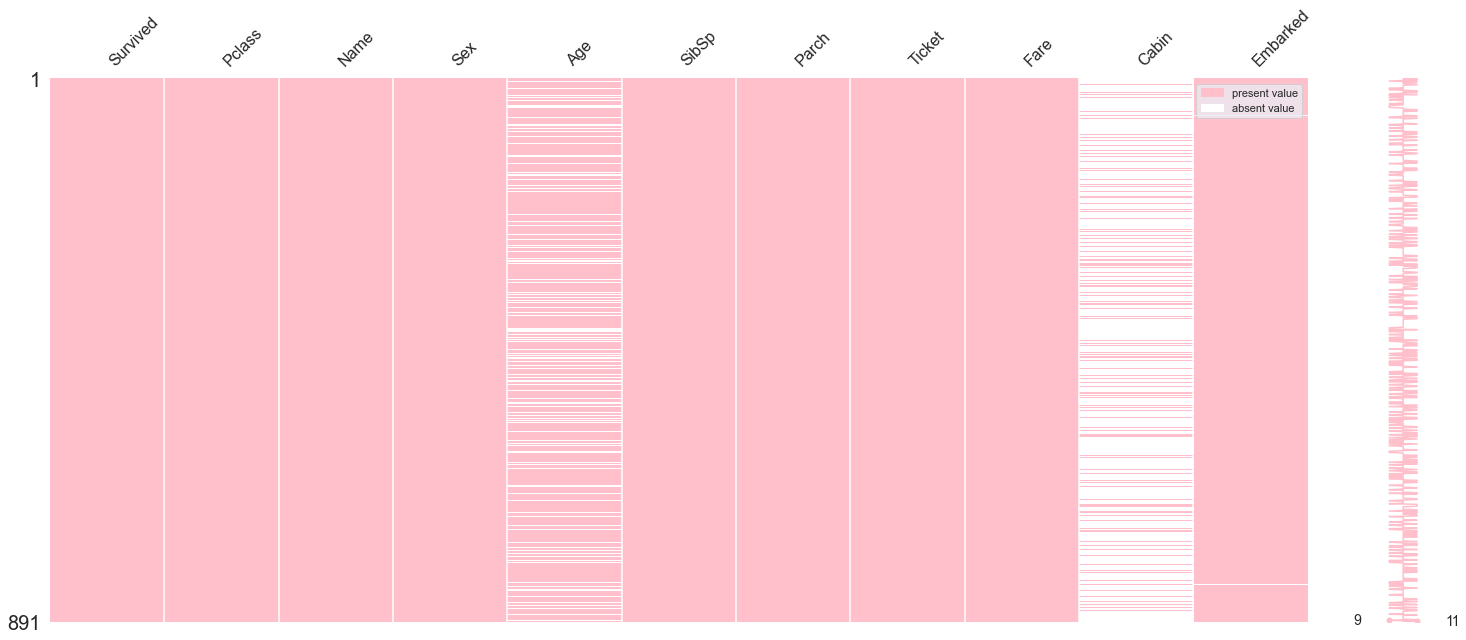

In [14]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2)[
        round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# display missing values in descending
print("Missing values in the dataframe in descending: \n", missing_percentage(train).sort_values(by='Total', ascending=False))

# visualize where the missing values are located
msno.matrix(train, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

Missing values in the dataframe in descending: 
        Total  Percent
Cabin    327    78.23
Age       86    20.57
Fare       1     0.24


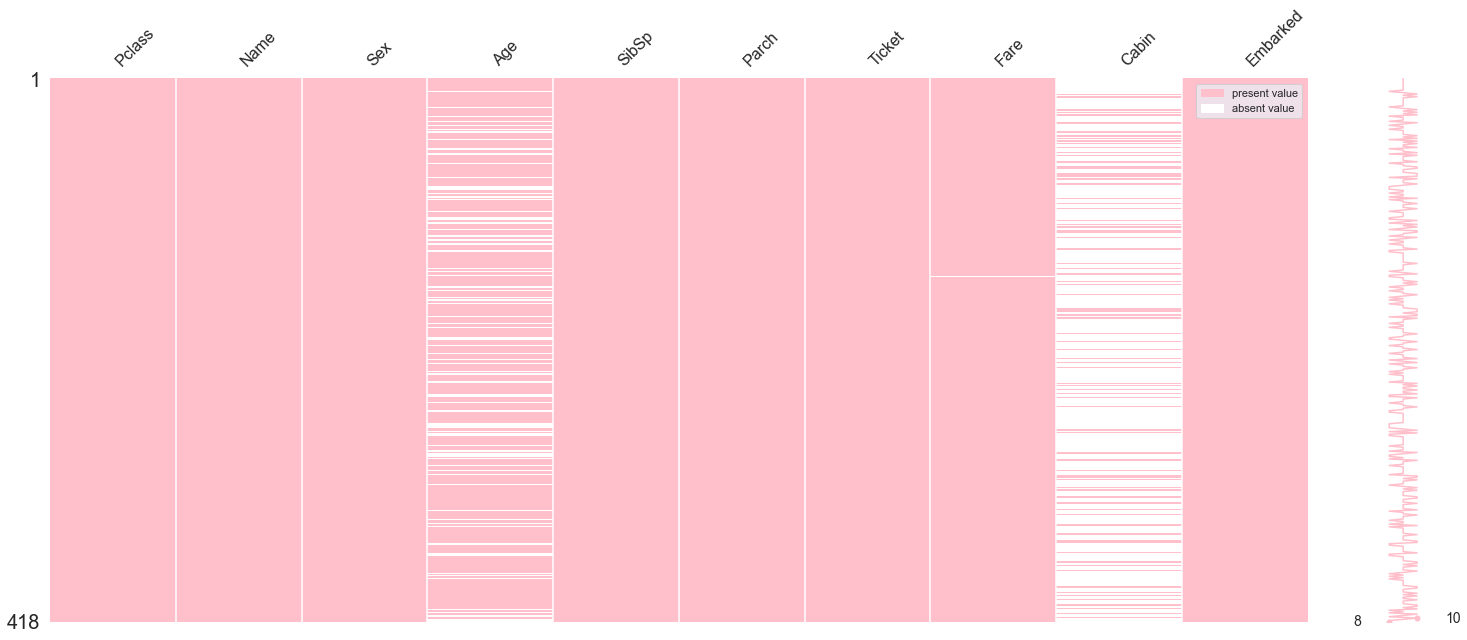

In [15]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2)[
        round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# display missing values in descending
print("Missing values in the dataframe in descending: \n", missing_percentage(test).sort_values(by='Total', ascending=False))

# visualize where the missing values are located
msno.matrix(test, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

### ------> OBSERVATION
*****
We see that in both **train**, and **test** dataset have missing values. Let's make an effort to fill these missing values starting with "Embarked" feature. 

<a id="2.4.2"></a>
## 🔍 2.4.2 Fill missing values:
****
<a id="2.4.2.a"></a>
### 2.4.2.a Filling missing values for Embarked Feature:

In [16]:
def percent_value_counts(df, feature):
    """This function takes in a dataframe and a column and finds the percentage of the value_counts"""
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    ## creating a df with th
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    ## concating percent and total dataframe

    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)

percent_value_counts(train, 'Embarked')

,Total,Percent
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


### ------> OBSERVATION
*****
It looks like there are only two null values( ~ 0.22 %) in the Embarked feature, we can replace these with the mode value "S". However, let's dig a little deeper. 

**Let's see what are those two null values**

In [17]:
train[train.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### ------> OBSERVATION
*****

We may be able to solve these two missing values by looking at other independent variables of the two raws. Both passengers are all survived, paid a fare of $80, are of Pclass 1 and female Sex. Let's see how the **Fare** is distributed among all **Pclass** and **Embarked** feature values

Text(0.5, 1.08, 'Fare of each Embarked and Pclass in both Training and Test set')

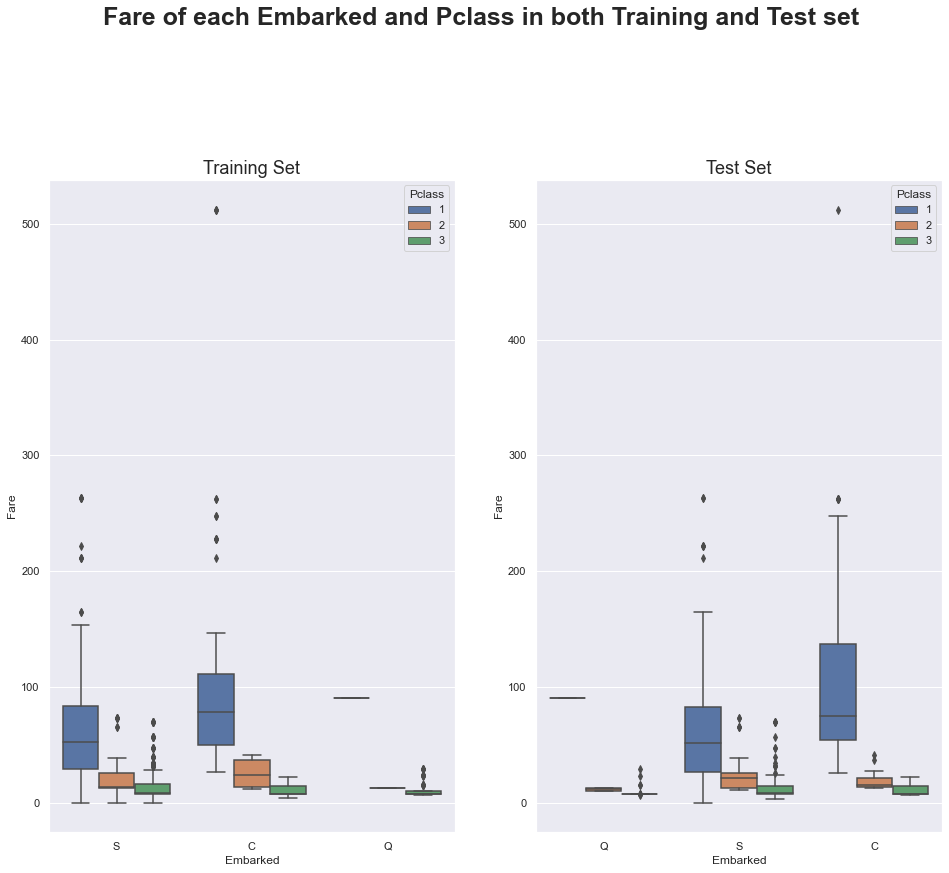

In [18]:
# import seaborn as sns
# import matplotlib.pyplot as plt
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train, ax = ax[0]);
ax2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=test, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title('Test Set',  fontsize = 18)

fig.show()
fig.suptitle("Fare of each Embarked and Pclass in both Training and Test set", fontsize=25, y=1.08, fontweight = 'bold')

### ------> OBSERVATION
*****
Here, in both training set and test set, the average fare closest to $80 are in the <b>C</b> Embarked values where pclass is 1. So, let's fill in the missing values as "C" 

In [19]:
## Replacing the null values in the Embarked column with the mode. 
train.Embarked.fillna("C", inplace=True)

<a id="2.4.2.a"></a>
### 2.4.2.a Filling missing values for Cabin Feature:

In [20]:
print("Train Cabin missing: " + str(train.Cabin.isnull().sum()/len(train.Cabin)))
print("Test Cabin missing: " + str(test.Cabin.isnull().sum()/len(test.Cabin)))

Train Cabin missing: 0.7710437710437711
Test Cabin missing: 0.7822966507177034


### ------------> OBSERVATION
***
Approximately 77% of Cabin feature is missing in the training data and 78% missing on the test data. 
There are 2 options:
-  Delete the feature
* we can brainstorm a little and find an appropriate way to put them in use. For example, We may say passengers with cabin record had a higher socio-economic-status then others. We may also say passengers with cabin record were more likely to be taken into consideration when loading into the boat.

<b> However, in my point of view, I do not desire to use that column, and I want to drop it. </b>

In [21]:
train = train.drop(columns=['Cabin'])
test = test.drop(columns=['Cabin'])

<a id="2.4.2.a"></a>
### 2.4.2.a Filling missing values for Fare Feature:

In [22]:
test[test.Fare.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


### ------------> OBSERVATION
***
Since the missing values is inconsiderable so I decided to fill it with mean.

In [23]:
missing_value = test[(test.Pclass == 3) & (test.Embarked == "S") & (test.Sex == "male")].Fare.mean()
## replace the test.fare null values with test.fare mean
test.Fare.fillna(missing_value, inplace=True)

<a id="2.4.2.a"></a>
### 2.4.2.a Filling missing values for Age Feature:

In [24]:
print ("Train age missing value: " + str((train.Age.isnull().sum()/len(train))*100)+str("%"))
print ("Test age missing value: " + str((test.Age.isnull().sum()/len(test))*100)+str("%"))

Train age missing value: 19.865319865319865%
Test age missing value: 20.574162679425836%


### ------------> OBSERVATION
***
Since the missing values is inconsiderable so I decided to fill it with mean.

In [25]:
train['Age'] = train.groupby(['Pclass', 'Sex', 'Embarked'])['Age'].apply(lambda x: x.fillna(x.median()))
test['Age'] = test.groupby(['Pclass', 'Sex', 'Embarked'])['Age'].apply(lambda x: x.fillna(x.median()))

<a id="2.5"></a>
# 🦄 2.5 Data type
***

## train set

In [26]:
train['Survived'] = train['Survived'].astype('int')
train['Pclass'] = train['Pclass'].astype('int')
train['Name'] = train['Name'].astype('string')
train['Sex'] = train['Sex'].astype('string')
train['Age'] = train['Age'].astype('int')
train['SibSp'] = train['SibSp'].astype('int')
train['Parch'] = train['Parch'].astype('int')
train['Ticket'] = train['Ticket'].astype('string')
train['Fare'] = train['Fare'].astype('float')
train['Embarked'] = train['Embarked'].astype('string')

## test set

In [27]:
test['Pclass'] = test['Pclass'].astype('int')
test['Name'] = test['Name'].astype('string')
test['Sex'] = test['Sex'].astype('string')
test['Age'] = test['Age'].astype('int')
test['SibSp'] = test['SibSp'].astype('int')
test['Parch'] = test['Parch'].astype('int')
test['Ticket'] = test['Ticket'].astype('string')
test['Fare'] = test['Fare'].astype('float')
test['Embarked'] = test['Embarked'].astype('string')

<a id="2.6"></a>
## 💭 2.6 Upper Case the content
In this section we will convert all the string value in the column to uppercase for further processing and keep all the string uniformly format. This will improve the analysis of the data, and also easier to perform any function related to the string. 

In [28]:
# Cast all values inside the dataframe (except the columns' name) into upper case.
train = train.applymap(lambda s: s.upper() if type(s) == str else s)
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"BRAUND, MR. OWEN HARRIS",MALE,22,1,0,A/5 21171,7.2500,S
1,1,1,"CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...",FEMALE,38,1,0,PC 17599,71.2833,C
2,1,3,"HEIKKINEN, MISS. LAINA",FEMALE,26,0,0,STON/O2. 3101282,7.9250,S


In [29]:
# Cast all values inside the dataframe (except the columns' name) into upper case.
test = test.applymap(lambda s: s.upper() if type(s) == str else s)
test.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"KELLY, MR. JAMES",MALE,34,0,0,330911,7.8292,Q
1,3,"WILKES, MRS. JAMES (ELLEN NEEDS)",FEMALE,47,1,0,363272,7.0000,S
2,2,"MYLES, MR. THOMAS FRANCIS",MALE,62,0,0,240276,9.6875,Q


<a id="2.7"></a>
# 📚 2.7 Extra-whitespaces:
***
There are some time maybe an extra-whitespaces in the database, which results in comparison failures, NaN Value, and greater size. First of all, extra-whitespaces cause string with and without it to not be the same. For instance, "ABC" != " ABC", these two strings are not equal, and that mistake cannot be noticed straightforwardly since the difference is inconsiderable. Nevertheless, the computer cannot understand that mistake. Secondly, the extra-whitespaces can be record as NaN values in pandas, which results in unexpected result. Last but not least, the whitespaces can increase the size of the database so that they can overflow the limited size. So that data should be checked with extra-whitespaces carefully.

In [30]:
def whitespace_remover(df):
    """
    The function will remove extra leading and trailing whitespace from the data.
    """
    # iterating over the columns
    for i in df.columns:
        # checking datatype of each columns
        if df[i].dtype == 'object' or df[i].dtype == 'str':
            # applying strip function on column
            df[i] = df[i].map(str.strip)
        else:
            # if condition is False then it will do nothing.
            pass

# remove all the extra whitespace
whitespace_remover(train)
whitespace_remover(test)

<a id="2.8"></a>
# 📊 2.8 Descriptive statistics for Central Tendency

In [31]:
# see the static of all numerical column
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.0,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.0,2.0000,3.0000,3.0,3.0000
Age,891.0,29.111111,13.375980,0.0,21.0000,27.0000,36.0,80.0000
SibSp,891.0,0.523008,1.102743,0.0,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.0,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [32]:
# see the static of all numerical column
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Pclass,418.0,2.265550,0.841838,1.0,1.0000,3.0000,3.000000,3.0000
Age,418.0,29.330144,13.177122,0.0,22.0000,25.0000,36.750000,76.0000
SibSp,418.0,0.447368,0.896760,0.0,0.0000,0.0000,1.000000,8.0000
Parch,418.0,0.392344,0.981429,0.0,0.0000,0.0000,0.000000,9.0000
Fare,418.0,35.572384,55.851741,0.0,7.8958,14.4542,31.471875,512.3292


<AxesSubplot:>

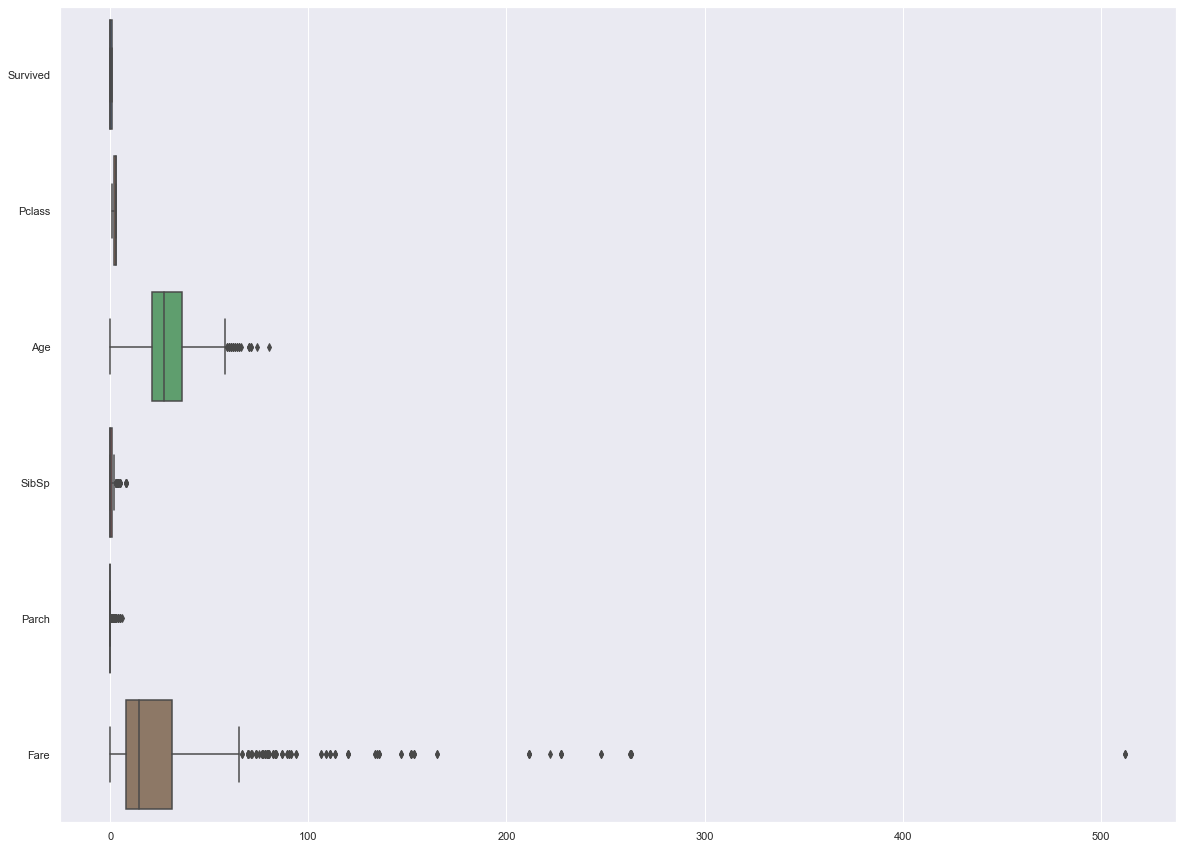

In [33]:
plt.rcParams['figure.figsize'] = [20, 15]
# plot the boxplot to see the outlier of each numerical column
sns.boxplot(data=train,orient="h")

### ---------> OBSERVATION
> For all numerical columns, I see some extreme outlier values in `Fare`. Let's investigate them further to see if they are real outliers or not using statistical techniques.

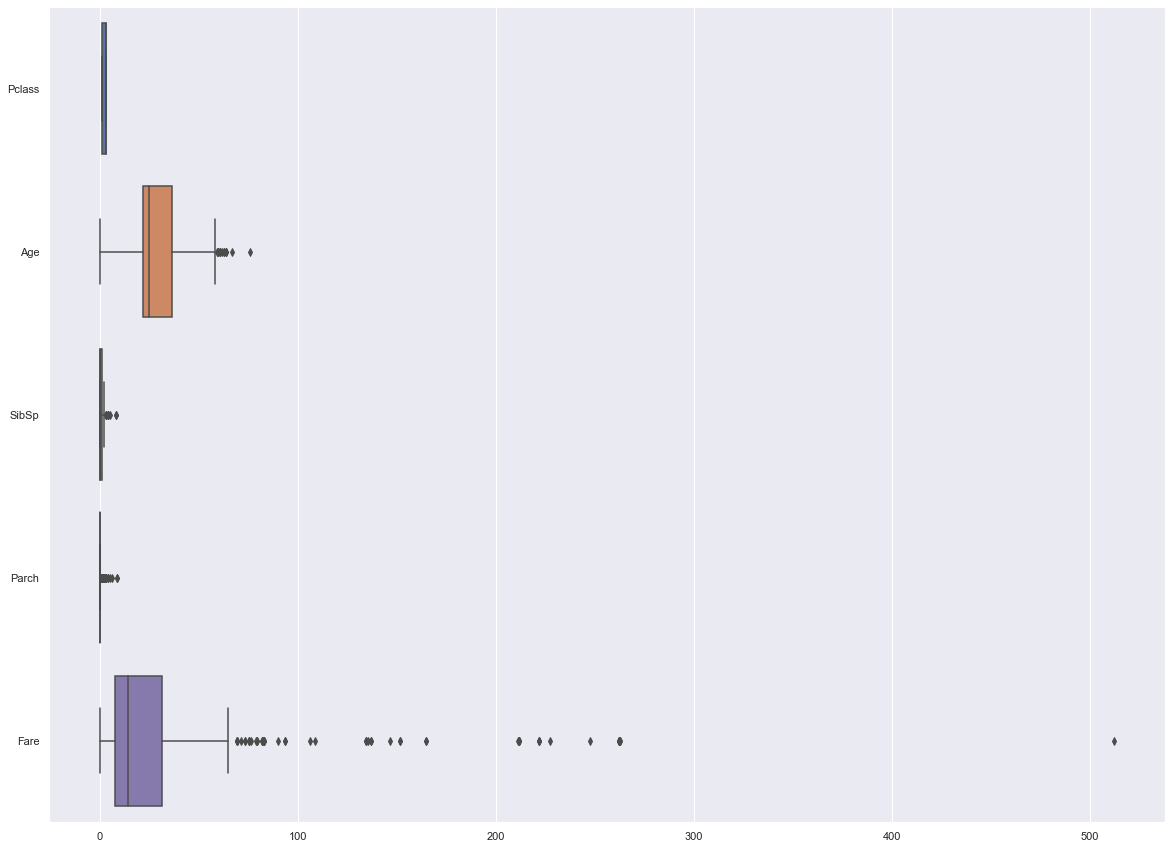

In [34]:
# plot the boxplot to see the outlier of each numerical column
sns.boxplot(data=test,orient="h")
plt.rcParams['figure.figsize'] = [20, 15]

### ---------> OBSERVATION
> For all numerical columns, I see some extreme outlier values in `Fare`. Let's investigate them further to see if they are real outliers or not using statistical techniques.

<a id="2.9"></a>
# 💢 2.9 Detect Outlier

In [35]:
q_low = train["Fare"].quantile(0.01)
q_hi  = train["Fare"].quantile(0.99)

df_filtered = train[(train["Fare"] > q_hi)]
df_filtered

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
27,0,1,"FORTUNE, MR. CHARLES ALEXANDER",MALE,19,3,2,19950,263.0000,S
88,1,1,"FORTUNE, MISS. MABEL HELEN",FEMALE,23,3,2,19950,263.0000,S
258,1,1,"WARD, MISS. ANNA",FEMALE,35,0,0,PC 17755,512.3292,C
311,1,1,"RYERSON, MISS. EMILY BORIE",FEMALE,18,2,2,PC 17608,262.3750,C
341,1,1,"FORTUNE, MISS. ALICE ELIZABETH",FEMALE,24,3,2,19950,263.0000,S
438,0,1,"FORTUNE, MR. MARK",MALE,64,1,4,19950,263.0000,S
679,1,1,"CARDEZA, MR. THOMAS DRAKE MARTINEZ",MALE,36,0,1,PC 17755,512.3292,C
737,1,1,"LESURER, MR. GUSTAVE J",MALE,35,0,0,PC 17755,512.3292,C
742,1,1,"RYERSON, MISS. SUSAN PARKER ""SUZETTE""",FEMALE,21,2,2,PC 17608,262.3750,C


In [36]:
q_low = test["Fare"].quantile(0.01)
q_hi  = test["Fare"].quantile(0.99)

df_filtered = test[(test["Fare"] > q_hi)]
df_filtered

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
53,1,"FORTUNE, MISS. ETHEL FLORA",FEMALE,28,3,2,19950,263.0000,S
69,1,"FORTUNE, MRS. MARK (MARY MCDOUGALD)",FEMALE,60,1,4,19950,263.0000,S
343,1,"CARDEZA, MRS. JAMES WARBURTON MARTINEZ (CHARLO...",FEMALE,58,0,1,PC 17755,512.3292,C


### ---------> OBSERVATION
***
Although these values have some influences on the statistic and the graph, it is still acceptable.

<a id="2.10"></a>
# 📂 2.10 Save the Intermediate data
***
After the cleaning step, all data is saved to a csv file for visualisation step later in dash.

In [37]:
train.to_csv("Data/train_cleaned.csv", encoding='utf-8')
test.to_csv("Data/test_cleaned.csv", encoding='utf-8')

<a id="3"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📊 3. Data exploration (EDA)</strong></h1>


# Analysis

**We will analyse the following:**

1. The target variable
2. Variable types (categorical and numerical)
3. Missing data
4. Numerical variables
    - Discrete
    - Continuous
    - Distributions
    - Transformations

5. Categorical variables
    - Cardinality
    - Rare Labels
    - Special mappings

6. Additional Reading Resources

Before we dive into finding relations between independent variables and our dependent variable(survivor), let us create some assumptions about how the relations may turn-out among features.

**Assumptions:**
- Gender: More female survived than male
- Pclass: Higher socio-economic status passenger survived more than others. 
- Age: Younger passenger survived more than other passengers. 
- Fare: Passenger with higher fare survived more that other passengers. This can be quite correlated with Pclass. 


Now, let's see how the features are related to each other by creating some visualizations. 

<a id="3.1"></a>
# 3.1 Overall look on target variable

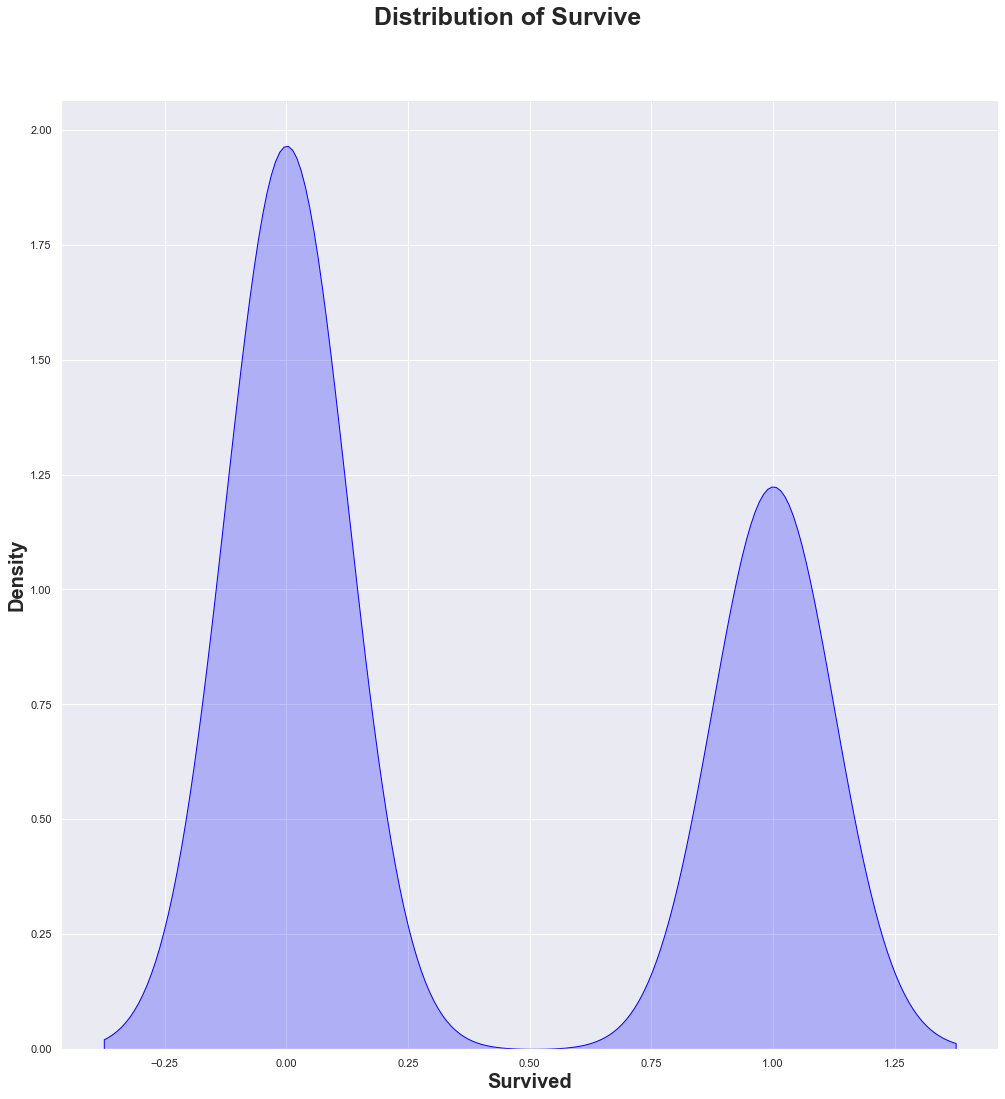

In [38]:
# sns.displot(train, x="Survived", hue="Pclass", kind="kde", fill=True)
plot = sns.displot(train, x="Survived", kind="kde", fill=True, color='blue', height= 14)


plot.fig.suptitle("Distribution of Survive", fontsize=25, y=1.08, fontweight = 'bold')
plot.set_xlabels("Survived", fontsize = 20, fontweight = 'bold' )
plot.set_ylabels("Density", fontsize = 20, fontweight = 'bold')

### ---------> OBSERVATION
***
It is a bionormal distribution

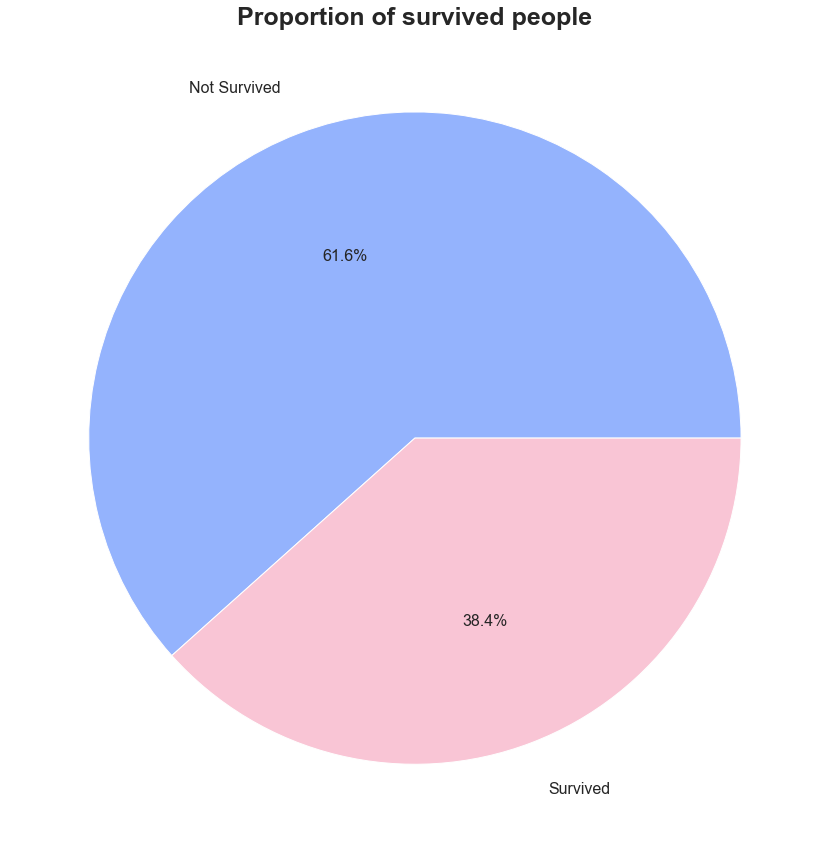

In [39]:
# Pie chart
labels = ['Not Survived', 'Survived']
#colors
colors = ['#94B3FD', '#F9C5D5']
ax = plt.pie(train['Survived'].value_counts(), labels=labels, labeldistance=1.15, colors=colors, autopct='%1.1f%%', textprops={'fontsize': 16});
plt.title('Proportion of survived people', fontsize=25, fontweight = 'bold')
plt.rcParams['figure.figsize'] = [20, 15]
plt.show()

### ---------> OBSERVATION
***
This pie plot is chosen to demonstrates the proportion of survived people. Overall, the number of Survied People is significantly lower than the passengers who were not survived. There are only 38.4% people survived while there are more than a half - 61.4% people who passed away.

<a id="3.2"></a>
# 3.2 Frequency of each corresponiding Target variable type
****
## Passenger Gender Distribution - Survived vs Not-survived

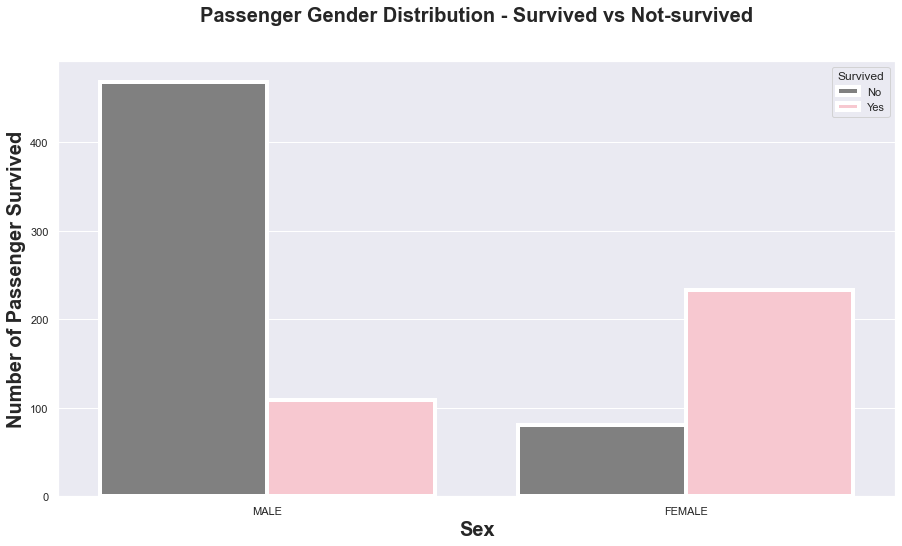

In [40]:
pal = {1:"pink", 0:"gray"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = train, 
                   linewidth=4, 
                   palette = pal
)

## Fixing title, xlabel and ylabel
plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 20, fontweight = 'bold', pad=40)
plt.xlabel("Sex", fontsize = 20, fontweight = 'bold');
plt.ylabel("Number of Passenger Survived", fontsize = 20, fontweight = 'bold')

## Fixing xticks
#labels = ['Female', 'Male']
#plt.xticks(sorted(train.Sex.unique()), labels)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()
plt.rcParams['figure.figsize'] = [20, 15]

### ---------> OBSERVATION
***
This bar chart is chosen since it can compare the magnitude between the number of survived and not survived people in both genders male and female. Overall, the number of male who were in the Titanic is higher than female. For male, the number of people who were not survived is remarkably higher than the survived. Contrarily, the number of survived femal is extremely higher than the female who were not survived. It shows that among all the females ~ 230 survived and ~ 70 did not survive. While among male passengers ~110 survived and ~480 did not survive. 

**Summary**
***
- As we suspected, female passengers have survived at a much better rate than male passengers. 
- It seems about right since females and children were the priority. 

## Passenger Class Distribution - Survived vs Non-Survived

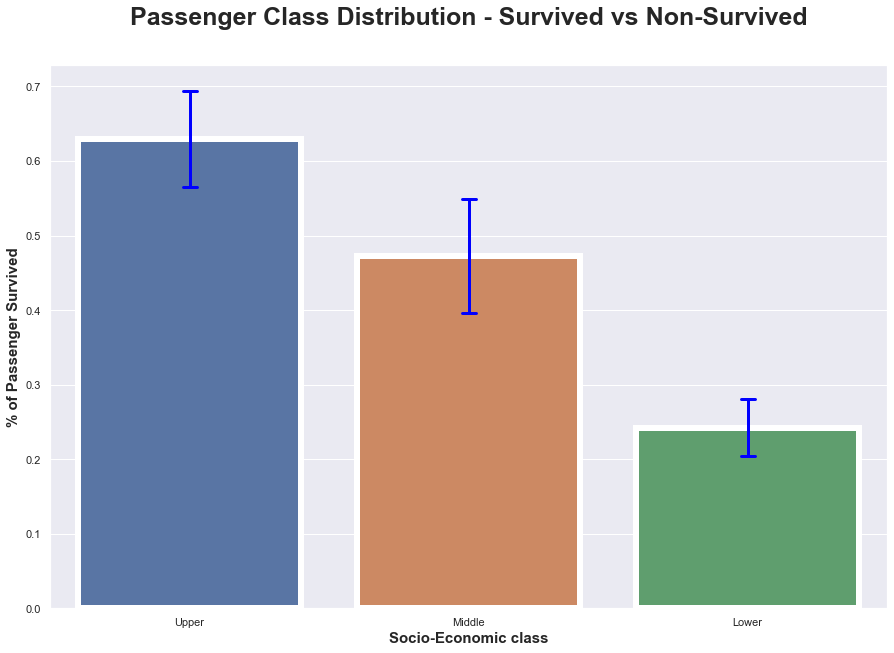

In [41]:
plt.subplots(figsize = (15,10))

sns.barplot(x = "Pclass", y = "Survived", data=train, linewidth=6, capsize = .05, errcolor='blue', errwidth = 3)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25, fontweight = 'bold', pad=40)
plt.xlabel("Socio-Economic class", fontsize = 15, fontweight = 'bold');
plt.ylabel("% of Passenger Survived", fontsize = 15, fontweight = 'bold');
names = ['Upper', 'Middle', 'Lower']
#val = sorted(train.Pclass.unique())
val = [0,1,2] ## this is just a temporary trick to get the label right. 
plt.xticks(val, names);

### ---------> OBSERVATION
***
This bar chart is chosen since it can compare the magnitude between the percentage of survived and not survived people in different Socio-Economic class. Overall, the higher the class that people were in, the higher chance that those people have to survive. 

- It looks like ...
    - ~ 63% first class passenger survived titanic tragedy, while 
    - ~ 48% second class and 
    - ~ only  24% third class passenger survived.  

## Passenger Class Distribution - Survived vs Non-Survived

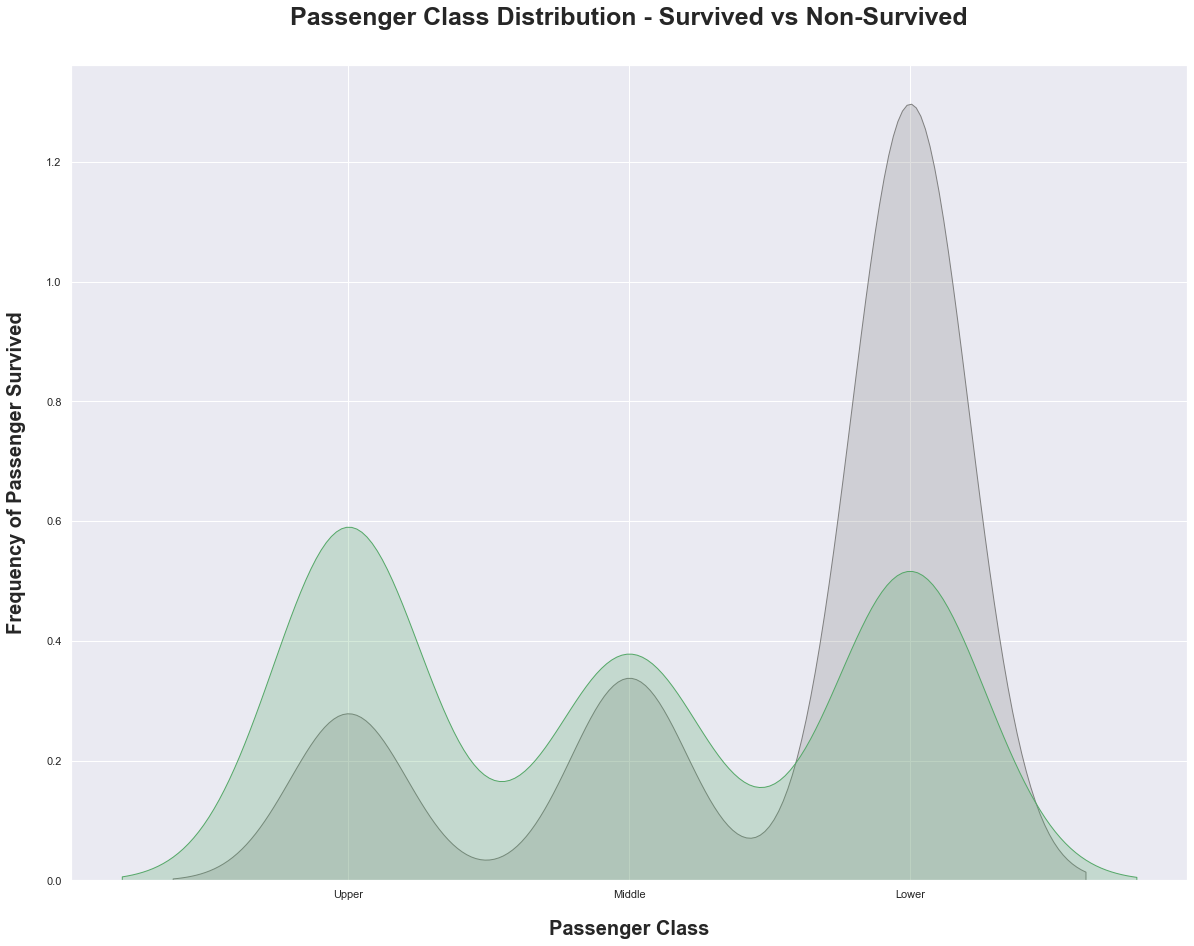

In [42]:
# Kernel Density Plot
fig = plt.figure(figsize=(20,15),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sns.kdeplot(train.Pclass[train.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived', 
              )
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25, fontweight = 'bold', pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 20, fontweight = 'bold', labelpad = 20)
plt.xlabel("Passenger Class", fontsize = 20, fontweight = 'bold',labelpad =20)
## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train.Pclass.unique()), labels);

### ---------> OBSERVATION
***
Most of the people who were survived is in the Upper class, while most of the people who were in the Lower class were not survived

**Summary**
***
- As we suspected, the people who were in the higher socio-economic status have more chances to survive than others. 
## Fare Distribution Survived vs Non Survived

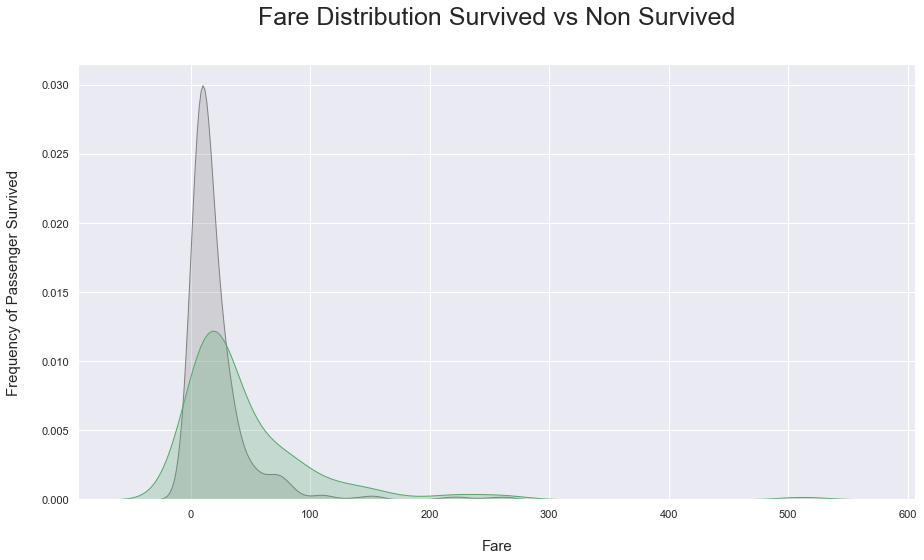

In [43]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Fare", fontsize = 15, labelpad = 20);

### ---------> OBSERVATION
***
This graph demonstrates the relationship between Fare and Survived. The remarkable growth in the plot the Fare which is under 100 dollar represents that most of the passengers who bought the ticket within that range were not survived. For the Fare is in the range from 100 to 200, the green shade is larger than the gray shade, so that it can be assumed that the higher the Fare that people pay, the higher chance those people can have to be survived. When fare is approximately more than 280 dollars, there is no gray shade which means, either everyone passed that fare point survived or maybe there is an outlier that clouds our judgment. Let's check...

In [44]:
train[train.Fare > 280]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,1,1,"WARD, MISS. ANNA",FEMALE,35,0,0,PC 17755,512.3292,C
679,1,1,"CARDEZA, MR. THOMAS DRAKE MARTINEZ",MALE,36,0,1,PC 17755,512.3292,C
737,1,1,"LESURER, MR. GUSTAVE J",MALE,35,0,0,PC 17755,512.3292,C


### ---------> OBSERVATION
***
As we assumed, it looks like an outlier with a fare of $512. We sure can delete this point. However, we will keep it for now. 

**Summary**
***
- As we suspected, same with the Pclass column, those passengers who paid with higher fare have more chance to survive than other passengers.

## Age Distribution - Surviver V.S. Non Survivors

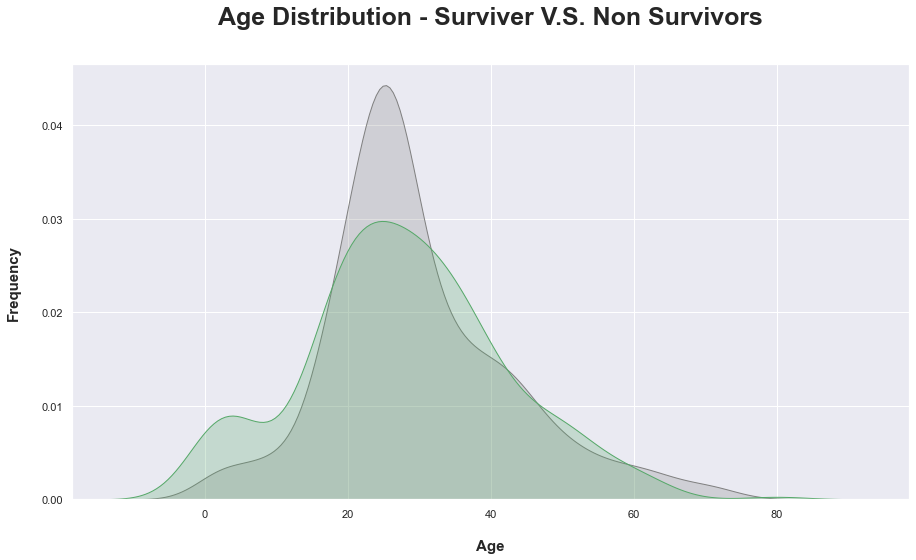

In [45]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 25, fontweight = 'bold', pad = 40)
plt.xlabel("Age", fontsize = 15, fontweight = 'bold', labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, fontweight = 'bold', labelpad= 20);

### ---------> OBSERVATION
***
This density plot demonstrates the density of Survival rate of each Age vary from 0 to 80. Overall, the age from 0 to 20 has the higher chance to survive than other age group. This may hint on the posibility that children and infants were the priority. 

**Summary**
***
- As we suspected, the younger passenger who were children and infants have more chance to survive than other passengers.

## Survived by Sex and Age

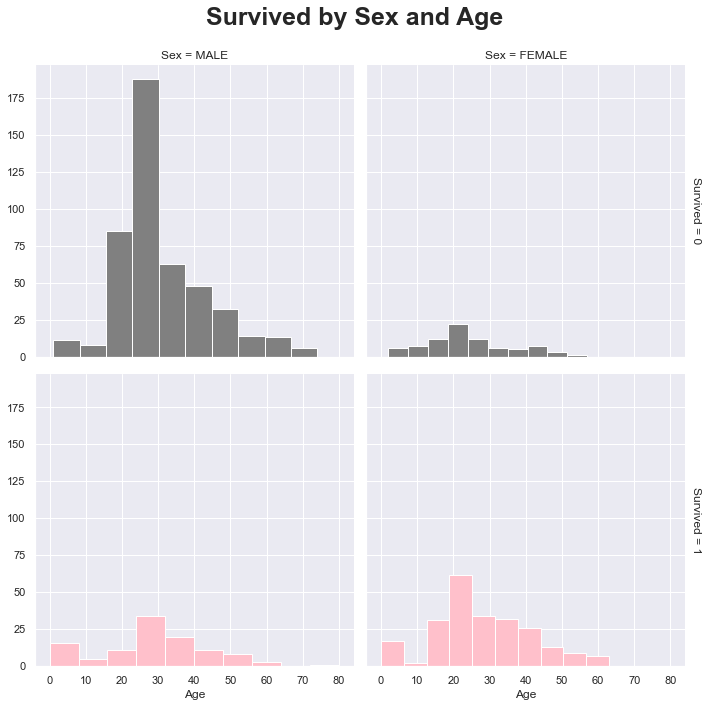

In [46]:
pal = {1:"pink", 0:"gray"}
g = sns.FacetGrid(train,size=5, col="Sex", row="Survived", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age", fontweight = 'bold', size = 25)
plt.subplots_adjust(top=0.90)

### ---------> OBSERVATION
***
This is another compelling facet grid illustrating four features relationship at once. They are **Age, Survived & Sex**. 
* The color illustrates passengers survival status(green represents survived, gray represents not survived)
* The column represents Sex(left being male, right stands for female)
***
Now that I have steered out the apparent let's see if we can get some insights that are not so obvious as we look at the data. 
* Most passengers were male and most of them were in their 20 and 30 year-old that may be the reason why people who were in between 20 and 30 were likely to not survive.
* More than 60% of the passengers who were male died. 
* More than 60% of the passengers who were female survived. 

## Survived by Sex, Age and Embarked

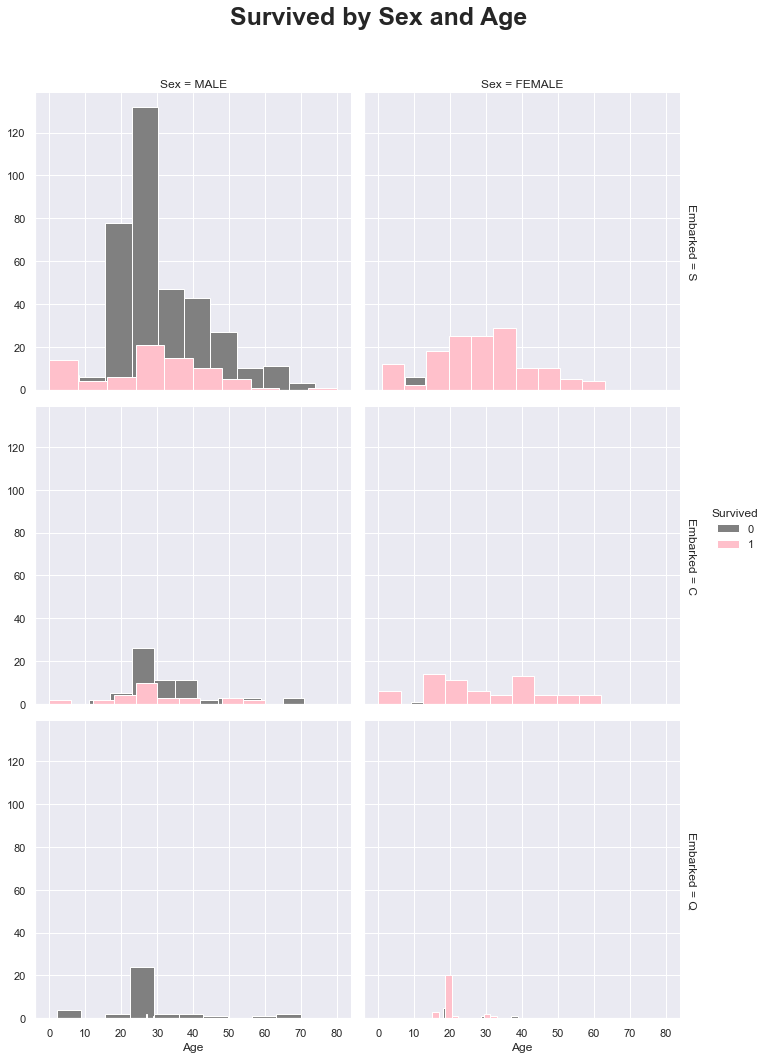

In [47]:
g = sns.FacetGrid(train,size=5, col="Sex", row="Embarked", margin_titles=True, hue = "Survived",
                  palette = pal
                  )
g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend();
g.fig.suptitle("Survived by Sex and Age", fontweight = 'bold', size = 25)
plt.subplots_adjust(top=0.90)

### ---------> OBSERVATION
***
This is another compelling facet grid illustrating four features relationship at once. They are **Embarked, Age, Survived & Sex**. 
* The color illustrates passengers survival status(green represents survived, gray represents not survived)
* The column represents Sex(left being male, right stands for female)
* The row represents Embarked(from top to bottom: S, C, Q)
***
Now that I have steered out the apparent let's see if we can get some insights that are not so obvious as we look at the data. 
* Most passengers seem to be boarded on Southampton(S).
* More than 60% of the passengers died boarded on Southampton. 
* More than 60% of the passengers lived boarded on Cherbourg(C).
* Pretty much every male that boarded on Queenstown(Q) did not survive. 
* There were very few females boarded on Queenstown, however, most of them survived. 

## Survived by Sex, Fare and Age

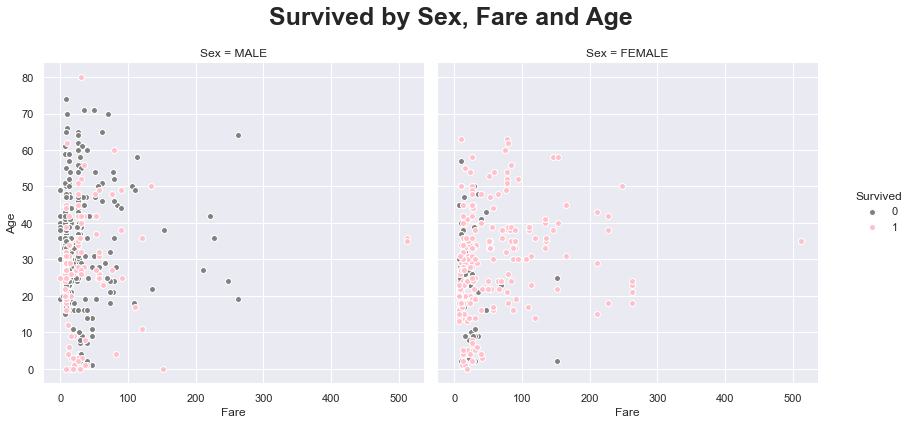

In [48]:
g = sns.FacetGrid(train, size=6,hue="Survived", col ="Sex", margin_titles=True,
                palette=pal,)
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.fig.suptitle("Survived by Sex, Fare and Age", fontweight = 'bold', size = 25)
plt.subplots_adjust(top=0.85)

### ---------> OBSERVATION
***
This facet grid unveils a couple of interesting insights. Let's find out.
* The grid above clearly demonstrates the three outliers with Fare of over \$500. At this point, I think we are quite confident that these outliers should be deleted.
* Most of the passengers were with in the Fare range of \$100. 

## Factorplot of Parents/Children survived

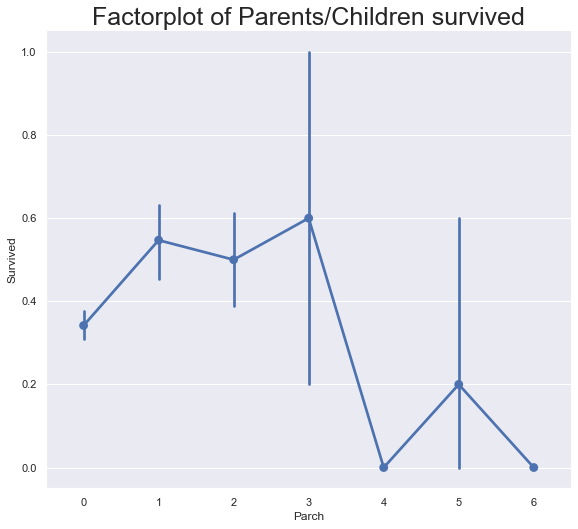

In [49]:
## dropping the three outliers where Fare is over $500 
train = train[train.Fare < 500]
## factor plot
sns.factorplot(x = "Parch", y = "Survived", data = train,kind = "point",size = 8)
plt.title("Factorplot of Parents/Children survived", fontsize = 25)
plt.subplots_adjust(top=0.85)

### ---------> OBSERVATION
***
This factorplot demonstrate the survival rate of the passenger in different family size. Passenger who traveled in big groups with parents/children had less survival rate than other passengers.

## Factorplot of Sibilings/Spouses survived

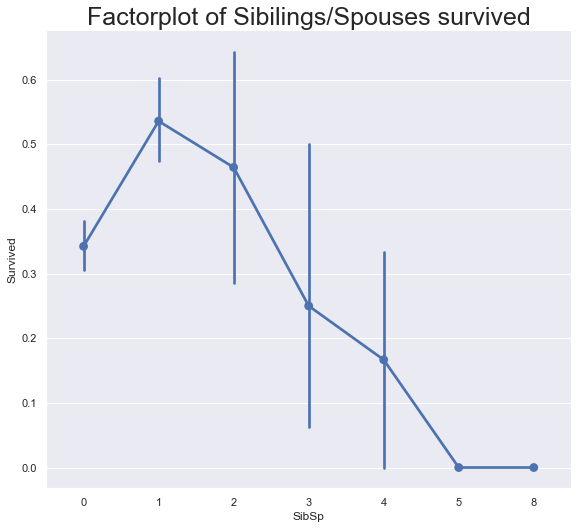

In [50]:
sns.factorplot(x =  "SibSp", y = "Survived", data = train,kind = "point",size = 8)
plt.title('Factorplot of Sibilings/Spouses survived', fontsize = 25)
plt.subplots_adjust(top=0.85)

### ---------> OBSERVATION
***
This factorplot demonstrate the survival rate of the passenger having different number of siblings/spouses. While, passenger who traveled in small groups with sibilings/spouses had better changes of survivint than other passengers.

In [51]:
# Placing 0 for female and 
# 1 for male in the "Sex" column. 
train['Sex'] = train.Sex.apply(lambda x: 0 if x == "FEMALE" else 1)
test['Sex'] = test.Sex.apply(lambda x: 0 if x == "FEMALE" else 1)

<a id="3.3"></a>
# 3.3 Statistical Overview
*****
## Train dataset information 

In [52]:
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,0.381757,2.313063,0.647523,29.090090,0.524775,0.381757,30.582164
std,0.486091,0.834007,0.478011,13.393649,1.104186,0.806949,41.176366
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,30.771850
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000


In [53]:
train.describe(include =['O'])

,Name,Ticket,Embarked
count,888,888,888
unique,888,680,3
top,"SMITH, MR. JAMES CLINCH",347082,S
freq,1,7,644


In [54]:
# Overview(Survived vs non survied)
survived_summary = train.groupby("Survived")
survived_summary.mean().reset_index()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,2.531876,0.852459,29.810565,0.553734,0.329690,22.117887
1,1,1.958702,0.315634,27.923304,0.477876,0.466077,44.289799


In [55]:
survived_summary = train.groupby("Sex")
survived_summary.mean().reset_index()

,Sex,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,0.741214,2.162939,27.038339,0.696486,0.651757,42.985091
1,1,0.186087,2.394783,30.206957,0.431304,0.234783,23.830658


In [56]:
survived_summary = train.groupby("Pclass")
survived_summary.mean().reset_index()

,Pclass,Survived,Sex,Age,SibSp,Parch,Fare
0,1,0.624413,0.563380,38.366197,0.422535,0.356808,78.124061
1,2,0.472826,0.586957,29.847826,0.402174,0.380435,20.662183
2,3,0.242363,0.706721,24.782077,0.615071,0.393075,13.675550


### ---------> OBSERVATION
***
I have gathered a small summary from the statistical overview above. Let's see what they are...
- This train data set has 891 raw and 9 columns. 
- only 38% passenger survived during that tragedy.
- ~74% female passenger survived, while only ~19% male passenger survived. 
- ~63% first class passengers survived, while only 24% lower class passenger survived.

<a id="3.4"></a>
# 3.4 Correlation Matrix and Heatmap
*****

In [57]:
pd.DataFrame(abs(train.corr()['Survived']).sort_values(ascending = False))

,Survived
Survived,1.000000
Sex,0.545899
Pclass,0.334068
Fare,0.261742
Parch,0.082157
Age,0.068494
SibSp,0.033395


### ---------> OBSERVATION
***
`Sex` is the most important correlated feature with `Survived`(dependent variable) feature followed by `Pclass`. 

In [58]:
## get the most important variables. 
corr = train.corr()**2
corr.Survived.sort_values(ascending=False)

Survived    1.000000
Sex         0.298006
Pclass      0.111601
Fare        0.068509
Parch       0.006750
Age         0.004691
SibSp       0.001115
Name: Survived, dtype: float64

**Squaring the correlation feature not only gives on positive correlations but also amplifies the relationships.** 

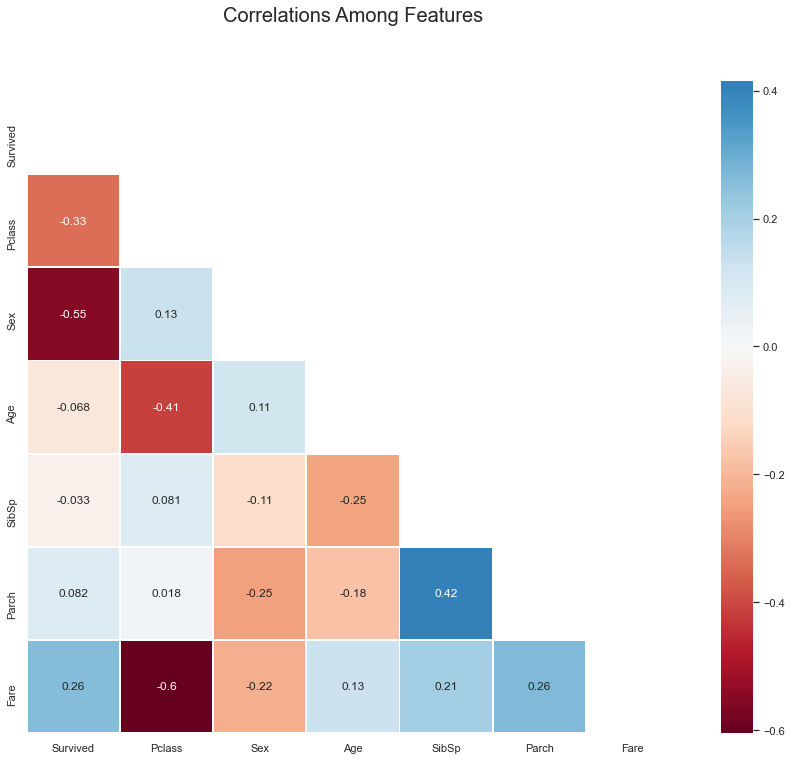

In [59]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
import numpy as np
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(train.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

### ---------> OBSERVATION
***
#### Positive Correlation Features:
- Fare and Survived: 0.26

#### Negative Correlation Features:
- Fare and Pclass: -0.6
- Sex and Survived: -0.55
- Pclass and Survived: -0.33


**So, Let's analyze these correlations a bit.** We have found some moderately strong relationships between different features. There is a definite positive correlation between Fare and Survived rated. This relationship reveals that the **passenger who paid more money for their ticket were more likely to survive**. This theory aligns with one other correlation which is the correlation between Fare and Pclass(-0.6). This relationship can be explained by saying that **first class passenger(1) paid more for fare then second class passenger(2), similarly second class passenger paid more than the third class passenger(3)**. This theory can also be supported by mentioning another Pclass correlation with our dependent variable, Survived. The correlation between Pclass and Survived is -0.33. This can also be explained by saying that **first class passenger had a better chance of surviving than the second or the third and so on**.

However, the most significant correlation with our dependent variable is the Sex variable, which is the info on whether the passenger was male or female. **This negative correlation with a magnitude of -0.54 which points towards some undeniable insights**. Let's do some statistics to see how statistically significant this correlation is.

## Statistical Test for Correlation
<a id="statistical_test"></a>
***

Statistical tests are the scientific way to prove the validation of theories. In any case, when we look at the data, we seem to have an intuitive understanding of where data is leading us. However, when we do statistical tests, we get a scientific or mathematical perspective of how significant these results are. Let's apply some of these methods and see how we are doing with our predictions.

###  Hypothesis Testing Outline

A hypothesis test compares the mean of a control group and experimental group and tries to find out whether the two sample means are different from each other and if they are different, how significant that difference is.
 
A **hypothesis test** usually consists of multiple parts: 

1. Formulate a well-developed research problem or question: The hypothesis test usually starts with a concrete and well-developed researched problem. We need to ask the right question that can be answered using statistical analysis. 
2. **The null hypothesis($H_0$) and Alternating hypothesis($H_1$)**:
> * The **null hypothesis($H_0$)** is something that is assumed to be true. It is the status quo. In a null hypothesis, the observations are the result of pure chance. When we set out to experiment, we form the null hypothesis by saying that there is no difference between the means of the control group and the experimental group.
> *  An **Alternative hypothesis($H_A$)** is a claim and the opposite of the null hypothesis.  It is going against the status quo. In an alternative theory, the observations show a real effect combined with a component of chance variation.
    
3. Determine the **test statistic**: test statistic can be used to assess the truth of the null hypothesis. Depending on the standard deviation we either use t-statistics or z-statistics. In addition to that, we want to identify whether the test is a one-tailed test or two-tailed test. [This](https://support.minitab.com/en-us/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/basics/null-and-alternative-hypotheses/) article explains it pretty well. [This](https://stattrek.com/hypothesis-test/hypothesis-testing.aspx) article is pretty good as well. 

4. Specify a **Significance level** and **Confidence Interval**: The significance level($\alpha$) is the probability of rejecting a null hypothesis when it is true. In other words, we are ***comfortable/confident*** with rejecting the null hypothesis a significant amount of times even though it is true. This considerable amount is our Significant level. In addition to that, Significance level is one minus our Confidence interval. For example, if we say, our significance level is 5%, then our confidence interval would be (1 - 0.05) = 0.95 or 95%. 

5. Compute the **T-Statistics/Z-Statistics**: Computing the t-statistics follows a simple equation. This equation slightly differs depending on one sample test or two sample test  

6. Compute the **P-value**: P-value is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis is correct. The p-value is known to be unintuitive, and even many professors are known to explain it wrong. I think this [video](https://www.youtube.com/watch?v=E4KCfcVwzyw) explains the p-value well. **The smaller the P-value, the stronger the evidence against the null hypothesis.**

7. **Describe the result and compare the p-value with the significance value($\alpha$)**: If p<=$\alpha$, then the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid. However if the p> $\alpha$, we say that, we fail to reject the null hypothesis. Even though this sentence is grammatically wrong, it is logically right. We never accept the null hypothesis just because we are doing the statistical test with sample data points.

We will follow each of these steps above to do your hypothesis testing below.

P.S. Khan Academy has a set of videos that I think are intuative and helped me understand conceptually. 

***

### Hypothesis testing for Titanic
#### Formulating a well developed researched question: 
Regarding this dataset, we can formulate the null hypothesis and alternative hypothesis by asking the following questions. 
> * **Is there a significant difference in the mean sex between the passenger who survived and passenger who did not survive?**. 
> * **Is there a substantial difference in the survival rate between the male and female passengers?**


#### The Null Hypothesis and The Alternative Hypothesis:
We can formulate our hypothesis by asking questions differently. However, it is essential to understand what our end goal is. Here our dependent variable or target variable is **Survived**. Therefore, we say

> **Null Hypothesis($H_0$):** There is no difference in the survival rate between the male and female passengers. or the mean difference between male and female passenger in the survival rate is zero.  
>  **Alternative Hypothesis($H_A$):** There is a difference in the survival rate between the male and female passengers. or the mean difference in the survival rate between male and female is not zero.

Onc thing we can do is try to set up the Null and Alternative Hypothesis in such way that, when we do our t-test, we can choose to do one tailed test. According to [this](https://support.minitab.com/en-us/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/basics/null-and-alternative-hypotheses/) article, one-tailed tests are more powerful than two-tailed test. In addition to that, [this](https://www.youtube.com/watch?v=5NcMFlrnYp8&list=PLIeGtxpvyG-LrjxQ60pxZaimkaKKs0zGF) video is also quite helpful understanding these topics. with this in mind we can update/modify our null and alternative hypothesis. Let's see how we can rewrite this..

> **Null Hypothesis(H0):** male mean is greater or equal to female mean.

> **Alternative Hypothesis(H1):** male mean is less than female mean. 

#### Determine the test statistics:
> This will be a two-tailed test since the difference between male and female passenger in the survival rate could be higher or lower than 0. 
> Since we do not know the standard deviation($\sigma$) and n is small, we will use the t-distribution. 

#### Specify the significance level:
> Specifying a significance level is an important step of the hypothesis test. It is an ultimate balance between type 1 error and type 2 error. We will discuss more in-depth about those in another lesson. For now, we have decided to make our significance level($\alpha$) = 0.05. So, our confidence interval or non-rejection region would be (1 - $\alpha$)=(1-0.05) = 95%. 

#### Computing T-statistics and P-value:
Let's take a random sample and see the difference.

## Difference in survival mean between male and female

In [60]:
male_mean = train[train['Sex'] == 1].Survived.mean()

female_mean = train[train['Sex'] == 0].Survived.mean()
print ("Male survival mean: " + str(male_mean))
print ("female survival mean: " + str(female_mean))

print ("The mean difference between male and female survival rate: " + str(female_mean - male_mean))

Male survival mean: 0.18608695652173912
female survival mean: 0.7412140575079872
The mean difference between male and female survival rate: 0.5551271009862481


### ---------> OBSERVATION
***
Now, we have to understand that those two means are not  **the population mean ($\bar{\mu}$)**.  *The population mean is a statistical term statistician uses to indicate the actual average of the entire group. The group can be any gathering of multiple numbers such as animal, human, plants, money, stocks.* For example, To find the age population mean of Bulgaria; we will have to account for every single person's age and take their age. Which is almost impossible and if we were to go that route; there is no point of doing statistics in the first place. Therefore we approach this problem using sample sets. The idea of using sample set is that; if we take multiple samples of the same population and take the mean of them and put them in a distribution; eventually the distribution start to look more like a **normal distribution**. The more samples we take and the more sample means will be added and, the closer the normal distribution will reach towards population mean. This is where **Central limit theory** comes from. We will go more in depth of this topic later on. 

Going back to our dataset, like we are saying these means above are part of the whole story. We were given part of the data to train our machine learning models, and the other part of the data was held back for testing. Therefore, It is impossible for us at this point to know the population means of survival for male and females. Situation like this calls for a statistical approach. We will use the sampling distribution approach to do the test. let's take 50 random sample of male and female from our train data.

## Difference in total mean between male and female


In [61]:
# separating male and female dataframe. 
import random
male = train[train['Sex'] == 1]
female = train[train['Sex'] == 0]

## empty list for storing mean sample
m_mean_samples = []
f_mean_samples = []

for i in range(50):
    m_mean_samples.append(np.mean(random.sample(list(male['Survived']),50,)))
    f_mean_samples.append(np.mean(random.sample(list(female['Survived']),50,)))
    

# Print them out
print (f"Male mean sample mean: {round(np.mean(m_mean_samples),2)}")
print (f"Male mean sample mean: {round(np.mean(f_mean_samples),2)}")
print (f"Difference between male and female mean sample mean: {round(np.mean(f_mean_samples) - np.mean(m_mean_samples),2)}")

Male mean sample mean: 0.18
Male mean sample mean: 0.74
Difference between male and female mean sample mean: 0.55


### ---------> OBSERVATION
***
H0: male mean is greater or equal to female mean<br>
H1: male mean is less than female mean. 

According to the samples our male samples ($\bar{x}_m$) and female samples($\bar{x}_f$) mean measured difference is ~ 0.55(statistically this is called the point estimate of the male population mean and female population mean). keeping in mind that...
* We randomly select 50 people to be in the male group and 50 people to be in the female group. 
* We know our sample is selected from a broader population(trainning set). 
* We know we could have totally ended up with a different random sample of males and females.
***
With all three points above in mind, how confident are we that, the measured difference is real or statistically significant? we can perform a **t-test** to evaluate that. When we perform a **t-test** we are usually trying to find out **an evidence of significant difference between population mean with hypothesized mean(1 sample t-test) or in our case difference between two population means(2 sample t-test).** 



The **t-statistics** is the measure of a degree to which our groups differ standardized by the variance of our measurements. In order words, it is basically the measure of signal over noise. Let us describe the previous sentence a bit more for clarification. I am going to use [this post](http://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-is-a-t-test-and-why-is-it-like-telling-a-kid-to-clean-up-that-mess-in-the-kitchen) as reference to describe the t-statistics here. 


#### Calculating the t-statistics
# $$t = \frac{\bar{x}-\mu}{\frac{S} {\sqrt{n}} }$$

Here..
* $\bar{x}$ is the sample mean. 
* $\mu$ is the hypothesized mean. 
* S is the standard deviation. 
* n is the sample size. 


1. Now, the denominator of this fraction $(\bar{x}-\mu)$ is basically the strength of the signal. where we calculate the difference between hypothesized mean and sample mean. If the mean difference is higher, then the signal is stronger. 

the numerator of this fraction ** ${S}/ {\sqrt{n}}$ ** calculates the amount of variation or noise of the data set. Here S is standard deviation, which tells us how much variation is there in the data. n is the sample size. 

So, according to the explanation above, the t-value or t-statistics is basically measures the strength of the signal(the difference) to the amount of noise(the variation) in the data and that is how we calculate the t-value in one sample t-test. However, in order to calculate between two sample population mean or in our case we will use the follow equation. 

# $$t = \frac{\bar{x}_M - \bar{x}_F}{\sqrt {s^2 (\frac{1}{n_M} + \frac{1}{n_F})}}$$

This equation may seem too complex, however, the idea behind these two are similar. Both of them have the concept of signal/noise. The only difference is that we replace our hypothesis mean with another sample mean and the two sample sizes repalce one sample size. 

Here..
* $\bar{x}_M$ is the mean of our male group sample measurements. 
* $ \bar{x}_F$ is the mean of female group samples. 
* $ n_M$ and $n_F$ are the sample number of observations in each group. 
* $ S^2$ is the sample variance.

It is good to have an understanding of what going on in the background. However, we will use **scipy.stats** to find the t-statistics. 

## Summary:
****
#### Compare P-value with $\alpha$
> It looks like the p-value is very small compared to our significance level($\alpha$)of 0.05. Our observation sample is statistically significant. Therefore, our null hypothesis is ruled out, and our alternative hypothesis is valid, which is "**There is a significant difference in the survival rate between the male and female passengers."**

<a id="4"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 🛠 4. Feature Engineering</strong></h1>

Feature Engineering is exactly what its sounds like. Sometimes we want to create extra features from with in the features that we have, sometimes we want to remove features that are alike. Features engineering is the simple word for doing all those. It is important to remember that we will create new features in such ways that will not cause **multicollinearity(when there is a relationship among independent variables)** to occur. 

<a id="4.1"></a>
# 4.1 Separating dependent and independent variables
****
Before we apply any machine learning models, It is important to separate dependent and independent variables. Our dependent variable or target variable is something that we are trying to find, and our independent variable is the features we use to find the dependent variable. The way we use machine learning algorithm in a dataset is that we train our machine learning model by specifying independent variables and dependent variable. To specify them, we need to separate them from each other, and the code below does just that.

P.S. In our test dataset, we do not have a dependent variable feature. We are to predict that using machine learning models.

In [62]:
# separating our independent and dependent variable
X = train.drop(['Survived'], axis = 1)
y = train["Survived"]

<a id="4.2"></a>
# 4.2 Encoding
****
Encode categorical data into digits to fit and evaluate model.

#### Few reasons why categorical values can be difficult to deal with are:

- High cardinality (Features with a large number of levels)
- Algebraic Machine Learning models, whose input must be numerical. (Hence categorical must be transformed into numbers before applying a learning algorithm to them)
- It is difficult for an ML model to differentiate between highly different levels.

I'll work with a small part of the entire data frame to demonstrate different encoding techniques and which one I choose for this project. 

### Encoding Algorithm for this project I use Binary Encoding and One-hot Encoding. 
First of all, those Name, Ticket and Embarked features are not ordinal, and they have a considerable number of catergorical values.

<a id="4.2.1"></a>
## 4.2.1 Binary Encoding for Name and Ticket Feature:
****
+ This is a combination of **one-hot encoding and Hash encoding**. In this encoding scheme, the categorical feature is first converted into numerical using an ordinal encoder. Then the numbers are transformed into a binary number. After that binary value is split into different columns. This results in **fewer columns compared to one-hot encoding.**

Binary encoding works well when there are a **high number of categories**. For example, the 2 `Country` and `Ethnicity` columns in my dataset.  

You must wonder why don't we stop after the ordinal encoding part itself, or why is a need for having to convert them into their binary equivalent only to further make columns. Here's one reason why, 

- When our **categorical column is not ordinal, and the number of categories is numerous, we can not apply only Label Encoding**, as that will lead to poor decision-making of our model. Unlike the case of ordinal columns. Having one-fourth of the total number of categories as columns in the dataframe can help in better decision-making of our model.  

Once again I have used the `category_encoders` library and its `.BinaryEncoder` function to achieve this.

**Binary encoding is a memory-efficient encoding scheme as it uses fewer features than one-hot encoding. Further, It reduces the curse of dimensionality for data with high cardinality.**

In [63]:
import category_encoders as ce

#Create object for binary encoding
encoder= ce.BinaryEncoder(cols=['Name', 'Ticket'],return_df=True)

#Fit and Transform Data 
train=encoder.fit_transform(train) 
train

,Survived,Pclass,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5,Name_6,Name_7,Name_8,Name_9,Sex,Age,SibSp,Parch,Ticket_0,Ticket_1,Ticket_2,Ticket_3,Ticket_4,Ticket_5,Ticket_6,Ticket_7,Ticket_8,Ticket_9,Fare,Embarked
0,0,3,0,0,0,0,0,0,0,0,0,1,1,22,1,0,0,0,0,0,0,0,0,0,0,1,7.2500,S
1,1,1,0,0,0,0,0,0,0,0,1,0,0,38,1,0,0,0,0,0,0,0,0,0,1,0,71.2833,C
2,1,3,0,0,0,0,0,0,0,0,1,1,0,26,0,0,0,0,0,0,0,0,0,0,1,1,7.9250,S
3,1,1,0,0,0,0,0,0,0,1,0,0,0,35,1,0,0,0,0,0,0,0,0,1,0,0,53.1000,S
4,0,3,0,0,0,0,0,0,0,1,0,1,1,35,0,0,0,0,0,0,0,0,0,1,0,1,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,1,0,1,1,1,0,1,0,0,1,27,0,0,1,0,1,0,1,0,0,1,0,1,13.0000,S
887,1,1,1,1,0,1,1,1,0,1,0,1,0,19,0,0,1,0,1,0,1,0,0,1,1,0,30.0000,S
888,0,3,1,1,0,1,1,1,0,1,1,0,0,23,1,2,1,0,0,1,1,0,0,1,1,0,23.4500,S
889,1,1,1,1,0,1,1,1,0,1,1,1,1,26,0,0,1,0,1,0,1,0,0,1,1,1,30.0000,C


<a id="4.2.2"></a>
## 4.2.2 One-hot Encoding for Embarked Feature:
****

In [64]:
encoder=ce.OneHotEncoder(cols='Embarked',handle_unknown='return_nan',return_df=True,use_cat_names=True)
#Fit and transform Data
train = encoder.fit_transform(train)
train

,Survived,Pclass,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5,Name_6,Name_7,Name_8,Name_9,Sex,Age,SibSp,Parch,Ticket_0,Ticket_1,Ticket_2,Ticket_3,Ticket_4,Ticket_5,Ticket_6,Ticket_7,Ticket_8,Ticket_9,Fare,Embarked_S,Embarked_C,Embarked_Q
0,0,3,0,0,0,0,0,0,0,0,0,1,1,22,1,0,0,0,0,0,0,0,0,0,0,1,7.2500,1.0,0.0,0.0
1,1,1,0,0,0,0,0,0,0,0,1,0,0,38,1,0,0,0,0,0,0,0,0,0,1,0,71.2833,0.0,1.0,0.0
2,1,3,0,0,0,0,0,0,0,0,1,1,0,26,0,0,0,0,0,0,0,0,0,0,1,1,7.9250,1.0,0.0,0.0
3,1,1,0,0,0,0,0,0,0,1,0,0,0,35,1,0,0,0,0,0,0,0,0,1,0,0,53.1000,1.0,0.0,0.0
4,0,3,0,0,0,0,0,0,0,1,0,1,1,35,0,0,0,0,0,0,0,0,0,1,0,1,8.0500,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,1,0,1,1,1,0,1,0,0,1,27,0,0,1,0,1,0,1,0,0,1,0,1,13.0000,1.0,0.0,0.0
887,1,1,1,1,0,1,1,1,0,1,0,1,0,19,0,0,1,0,1,0,1,0,0,1,1,0,30.0000,1.0,0.0,0.0
888,0,3,1,1,0,1,1,1,0,1,1,0,0,23,1,2,1,0,0,1,1,0,0,1,1,0,23.4500,1.0,0.0,0.0
889,1,1,1,1,0,1,1,1,0,1,1,1,1,26,0,0,1,0,1,0,1,0,0,1,1,1,30.0000,0.0,1.0,0.0


<a id="4.3"></a>
# 4.3 Separating dependent and independent variables
***
Before we apply any machine learning models, It is important to separate dependent and independent variables. Our dependent variable or target variable is something that we are trying to find, and our independent variable is the features we use to find the dependent variable. The way we use machine learning algorithm in a dataset is that we train our machine learning model by specifying independent variables and dependent variable. To specify them, we need to separate them from each other, and the code below does just that.

P.S. In our test dataset, we do not have a dependent variable feature. We are to predict that using machine learning models. 

In [65]:
# separating our independent and dependent variable
X = train.drop(['Survived'], axis = 1)
y = train["Survived"]

<a id="4.4"></a>
# 4.4 Splitting the training data
***
There are multiple ways of splitting data. They are...
* train_test_split.
* cross_validation. 

We have separated dependent and independent features; We have separated train and test data. So, why do we still have to split our training data? If you are curious about that, I have the answer. For this competition, when we train the machine learning algorithms, we use part of the training set usually two-thirds of the train data. Once we train our algorithm using 2/3 of the train data, we start to test our algorithms using the remaining data. If the model performs well we dump our test data in the algorithms to predict and submit the competition. The code below, basically splits the train data into 4 parts, **X_train**, **X_test**, **y_train**, **y_test**.  
* **X_train** and **y_train** first used to train the algorithm. 
* then, **X_test** is used in that trained algorithms to predict **outcomes. **
* Once we get the **outcomes**, we compare it with **y_test**

By comparing the **outcome** of the model with **y_test**, we can determine whether our algorithms are performing well or not. As we compare we use confusion matrix to determine different aspects of model performance.

P.S. When we use cross validation it is important to remember not to use **X_train, X_test, y_train and y_test**, rather we will use **X and y**. I will discuss more on that. 

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state=0)

print("Length of X_train: " + str(len(X_train)))
print("Length of X_test: " + str(len(X_test)))

Length of X_train: 594
Length of X_test: 294


<a id="4.5"></a>
# 4.5 Feature Scaling
***
Feature scaling is an important concept of machine learning models. Often times a dataset contain features highly varying in magnitude and unit. For some machine learning models, it is not a problem. However, for many other ones, its quite a problem. Many machine learning algorithms uses euclidian distances to calculate the distance between two points, it is quite a problem. Let's again look at a the sample of the **train** dataset below.

In [67]:
train.sample(5)

,Survived,Pclass,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5,Name_6,Name_7,Name_8,Name_9,Sex,Age,SibSp,Parch,Ticket_0,Ticket_1,Ticket_2,Ticket_3,Ticket_4,Ticket_5,Ticket_6,Ticket_7,Ticket_8,Ticket_9,Fare,Embarked_S,Embarked_C,Embarked_Q
91,0,3,0,0,0,1,0,1,1,1,0,0,1,20,0,0,0,0,0,1,0,1,1,0,0,1,7.8542,1.0,0.0,0.0
240,0,3,0,0,1,1,1,1,0,0,0,1,0,14,1,0,0,0,0,1,1,0,1,1,0,1,14.4542,0.0,1.0,0.0
572,1,1,1,0,0,0,1,1,1,1,0,0,1,36,0,0,0,1,1,1,0,1,1,0,0,1,26.3875,1.0,0.0,0.0
731,0,3,1,0,1,1,0,1,1,0,1,0,1,11,0,0,0,0,1,0,1,1,1,0,1,0,18.7875,0.0,1.0,0.0
733,0,2,1,0,1,1,0,1,1,1,0,0,1,23,0,0,1,0,0,1,0,0,0,1,0,1,13.0000,1.0,0.0,0.0


### ---------> OBSERVATION
***
Here **Age** and **Calculated_fare** is much higher in magnitude compared to others machine learning features. This can create problems as many machine learning models will get confused thinking **Age** and **Calculated_fare** have higher weight than other features. Therefore, we need to do feature scaling to get a better result. 
There are multiple ways to do feature scaling. 
<ul>
    <li><b>MinMaxScaler</b>-Scales the data using the max and min values so that it fits between 0 and 1.</li>
    <li><b>StandardScaler</b>-Scales the data so that it has mean 0 and variance of 1.</li>
    <li><b>RobustScaler</b>-Scales the data similary to Standard Scaler, but makes use of the median and scales using the interquertile range so as to aviod issues with large outliers.</b>
 </ul>
I will discuss more on that in a different kernel. For now we will use <b>Standard Scaler</b> to feature scale our dataset. 

P.S. I am showing a sample of both before and after so that you can see how scaling changes the dataset. 

<h1><font color="$5831bc" face="Comic Sans MS">Before Scaling</font></h1>

In [68]:
headers = X_train.columns 

X_train.head()

,Pclass,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5,Name_6,Name_7,Name_8,Name_9,Sex,Age,SibSp,Parch,Ticket_0,Ticket_1,Ticket_2,Ticket_3,Ticket_4,Ticket_5,Ticket_6,Ticket_7,Ticket_8,Ticket_9,Fare,Embarked_S,Embarked_C,Embarked_Q
170,1,0,0,1,0,1,0,1,0,1,1,1,61,0,0,0,0,1,0,0,1,1,1,0,1,33.5000,1.0,0.0,0.0
187,1,0,0,1,0,1,1,1,1,0,0,1,45,0,0,0,0,1,0,1,0,1,0,1,0,26.5500,1.0,0.0,0.0
849,1,1,1,0,1,0,0,1,1,1,1,0,38,1,0,0,1,0,1,1,1,1,1,1,1,89.1042,0.0,1.0,0.0
433,3,0,1,1,0,1,1,0,0,0,1,1,17,0,0,0,1,0,1,1,1,0,0,1,0,7.1250,1.0,0.0,0.0
651,2,1,0,1,0,0,0,1,0,1,1,0,18,0,1,0,0,0,1,1,0,0,0,0,0,23.0000,1.0,0.0,0.0


In [69]:
# Feature Scaling
## We will be using standardscaler to transform
from sklearn.preprocessing import StandardScaler
st_scale = StandardScaler()

## transforming "train_x"
X_train = st_scale.fit_transform(X_train)
## transforming "test_x"
X_test = st_scale.transform(X_test)

<h1><font color="#5831bc" face="Comic Sans MS">After Scaling</font></h1>

In [70]:
pd.DataFrame(X_train, columns=headers).head()

,Pclass,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5,Name_6,Name_7,Name_8,Name_9,Sex,Age,SibSp,Parch,Ticket_0,Ticket_1,Ticket_2,Ticket_3,Ticket_4,Ticket_5,Ticket_6,Ticket_7,Ticket_8,Ticket_9,Fare,Embarked_S,Embarked_C,Embarked_Q
0,-1.569466,-0.864326,-0.855440,1.137293,-1.051847,1.013560,-1.0,1.020410,-0.989949,1.010153,1.058975,0.725942,2.396551,-0.464750,-0.463616,-0.500526,-0.739510,1.214496,-0.960380,-0.944309,1.020410,1.006757,1.027309,-0.960380,0.944309,0.079327,0.607177,-0.471405,-0.309743
1,-1.569466,-0.864326,-0.855440,1.137293,-1.051847,1.013560,1.0,1.020410,1.010153,-0.989949,-0.944309,0.725942,1.202985,-0.464750,-0.463616,-0.500526,-0.739510,1.214496,-0.960380,1.058975,-0.979998,1.006757,-0.973417,1.041254,-1.058975,-0.095246,0.607177,-0.471405,-0.309743
2,-1.569466,1.156971,1.168988,-0.879281,0.950708,-0.986621,-1.0,1.020410,1.010153,1.010153,1.058975,-1.377520,0.680800,0.356862,-0.463616,-0.500526,1.352247,-0.823387,1.041254,1.058975,1.020410,1.006757,1.027309,1.041254,0.944309,1.476011,-1.646967,2.121320,-0.309743
3,0.830181,-0.864326,1.168988,1.137293,-1.051847,1.013560,1.0,-0.979998,-0.989949,-0.989949,1.058975,0.725942,-0.885756,-0.464750,-0.463616,-0.500526,1.352247,-0.823387,1.041254,1.058975,1.020410,-0.993289,-0.973417,1.041254,-1.058975,-0.583169,0.607177,-0.471405,-0.309743
4,-0.369643,1.156971,-0.855440,1.137293,-1.051847,-0.986621,-1.0,1.020410,-0.989949,1.010153,1.058975,-1.377520,-0.811158,-0.464750,0.703282,-0.500526,-0.739510,-0.823387,1.041254,1.058975,-0.979998,-0.993289,-0.973417,-0.960380,-1.058975,-0.184416,0.607177,-0.471405,-0.309743


<a id="4"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 🤖 5. Model training</strong></h1>

<a id="5.1"></a>
# 5.1 Logistic Regression
***
<img src="https://www.machinelearningplus.com/wp-content/uploads/2017/09/linear_vs_logistic_regression.jpg" class="center" width="600" >
<h4 align="right">Source: Machine Learning Plus</h4>

**Logistic Regression**. Logistic regression is a famous classifier still used today frequently despite its age. It is a regression similar to **Linear regression**, yet operates as a classifier. To understand logistic regression, we should have some idea about linear regression. Let's have a look at it. 

Hopefully, we all know that any linear equation can be written in the form of...

# $$ {y} = mX + b $$

* Here, m = slope of the regression line. it represents the relationship between X and y. 
* b = y-intercept. 
* x and y are the points location in x_axis and y_axis respectively. 
<br/>

If you want to know how, check out this [video](https://www.khanacademy.org/math/algebra/two-var-linear-equations/writing-slope-intercept-equations/v/graphs-using-slope-intercept-form). So, this slope equation can also be written as...

## $$ y = \beta_0 + \beta_1 x + \epsilon \\ $$

This is the equation for a simple linear regression.
here,
* y = Dependent variable. 
* $\beta_0$ = the intercept, it is constant. 
* $\beta_1$ = Coefficient of independent variable. 
* $x$ = Indepentent variable. 
* $ \epsilon$ = error or residual. 


We use this function to predict the value of a dependent variable with the help of only one independent variable. Therefore this regression is called **Simple Linear Regression.** 

Similar to **Simple Linear Regression**, there is **Multiple Linear Regression** which can be used to predict dependent variable using multiple independent variables. Let's look at the equation for **Multiple Linear Regression**, 

## $$ \hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n $$


If you would like to know more about **Linear Regression** checkout this [kernel](https://www.kaggle.com/masumrumi/a-stats-analysis-and-ml-workflow-of-house-pricing). 

So, we know/reviewed a bit about linear regression, and therefore we know how to deal with data that looks like this, 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/1200px-Linear_regression.svg.png" width="600">

Here the data point's in this graph is continuous and therefore the problem is a regression one. However, what if we have data that when plotted in a scatter graph, looks like this...
